<a href="https://colab.research.google.com/github/oscargallardo1/Data-Analysis-Projects/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

In [2]:
#pip install xgboost

In [3]:
#!pip install gitly==1.0.1

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
#import warnings
#warnings.filterwarnings('ignore')

In [5]:
from gitly.colab.plot import GitlyPlotter

# Instantiate the object using 'github' or 'git' for static plots
# or 'colab' for default dinamic Plotly plots
gitly = GitlyPlotter('github')

There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


## Medical Cost Analysis

In this Project analysis, I analyze this dataset to determine what attributes factor more on the medical cost of patients. This dataset consists of several patient attributes such as age, BMI, their region, whether they are a smoker, and their total charges.

In [6]:
df = pd.read_csv('insurance.csv')

In [7]:
df.shape

(1338, 7)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
df_age = df.groupby(by='age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


## Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

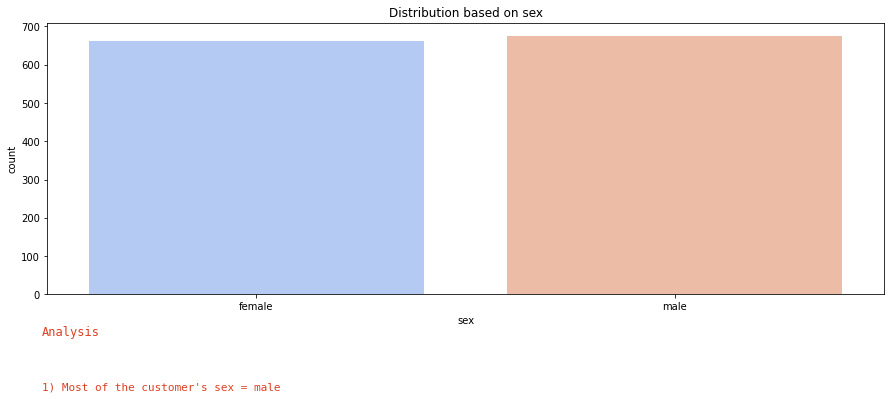

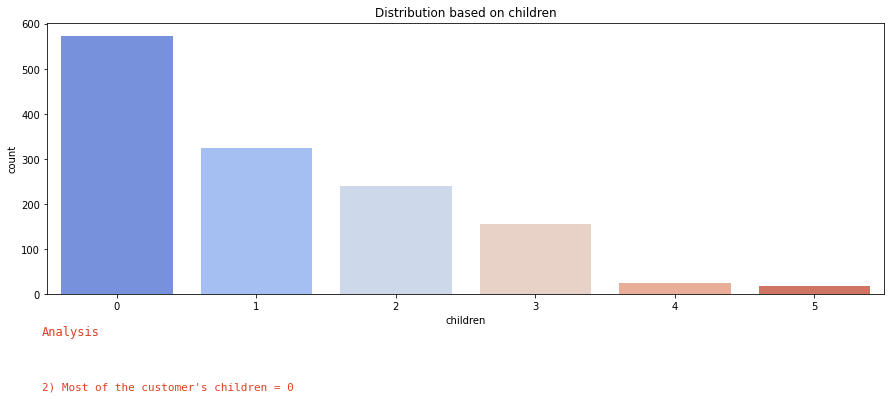

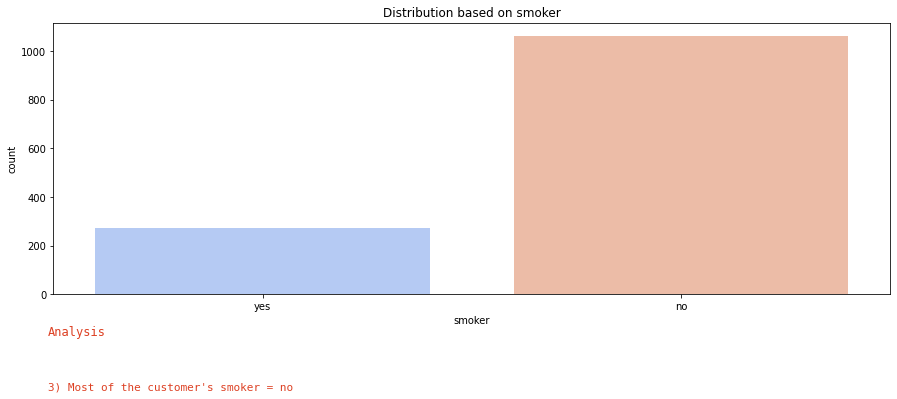

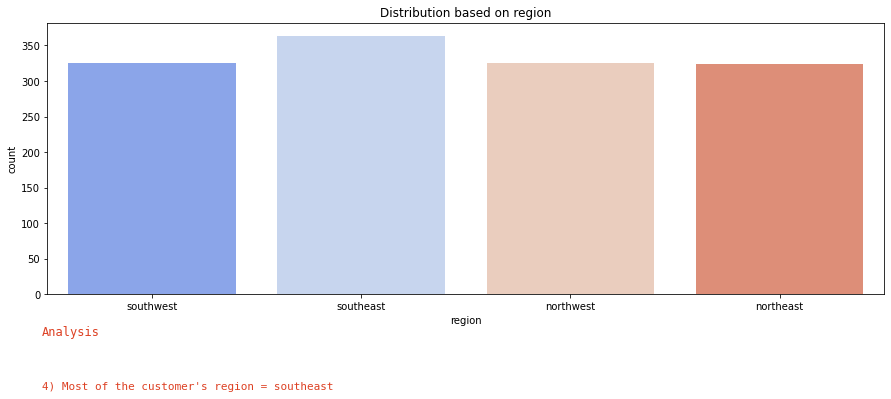

In [13]:
insights = []
counter = 1
for i in df.columns:
    if df[i].nunique() < 20:
        plt.figure(figsize=(15,5))
        plt.title(f'Distribution based on {i}')
        c = Counter(df[i])
        sns.countplot(df[i],palette='coolwarm')
        plt.figtext(0.12, 0.01, 'Analysis', fontname = 'monospace', size = 12, color = '#dd4124')
        plt.figtext(0.12, -0.14, f"{counter}) Most of the customer's {i} = {c.most_common(1)[0][0]}",fontname = 'monospace', size = 11, color = '#dd4124')
        insights.append((f"**{counter}) Most of the customer's {i} = {c.most_common(1)[0][0]}**\n\n"))
        counter+=1

### Checking for Linear correlation between Patient attributes and charges

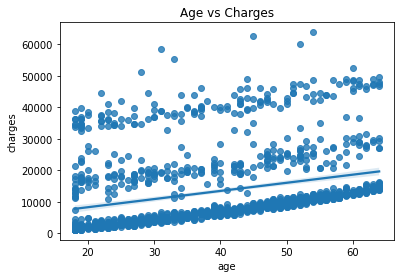

In [14]:
sns.regplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

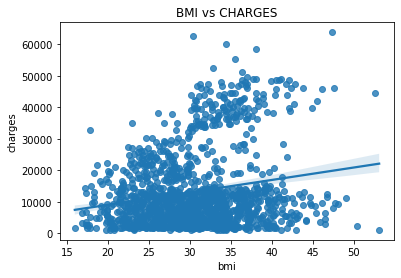

In [15]:
sns.regplot(x='bmi', y='charges', data=df)
plt.title('BMI vs CHARGES')
plt.show()

## Distribution Based on Smoker and Total Charges

In [16]:
smokercharges = df.groupby('smoker')['charges'].sum()

In [17]:
smokercharges

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

In [18]:
smokercharges.values

array([8974061.468919, 8781763.52184 ])

In [19]:
fig = px.bar(x = [i for i in smokercharges.index], y = [i for i in smokercharges],color =[i for i in smokercharges.index],template='plotly_dark')
fig.update_layout(xaxis_title = 'Smoker', yaxis_title = "Charges",title = "Distribution Based on Smoker and Total Charges")

**Although distribution of Smoker_Yes was very low as compared to Smoker_No, the charges are not substantially differing from each other, Which means people who all are smoking have higher insurance charges.**

## Distribution based on Average Insurance Costs by Age and Smoking Status

In [20]:
df['Age_Group'] = ['18 - 29' if i<30 else '30 - 49' if i>=30 and i < 50 else '50 +' if i > 50 and i <60 else 'Over 60' for i in df.age]

In [21]:
plot_df = df.groupby(['Age_Group','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)

In [22]:
plot_df.head(10)

,Age_Group,smoker,charges
0,18 - 29,no,4418.568274
2,30 - 49,no,7821.924186
4,50 +,no,12822.026582
6,Over 60,no,14545.352319
1,18 - 29,yes,27518.035262
3,30 - 49,yes,31502.707094
5,50 +,yes,37499.067760
7,Over 60,yes,40239.423577


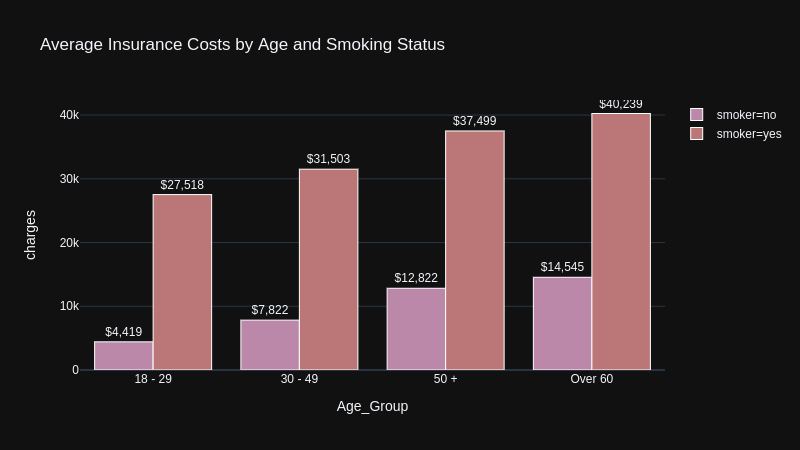

In [23]:
fig = px.bar(plot_df, x='Age_Group', y='charges', color='smoker', height=500, text='charges', 
             barmode='group', color_discrete_sequence=['#B8A','#B77'],
             title="Average Insurance Costs by Age and Smoking Status",template= 'plotly_dark')
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#FFFFFF'))
#fig.show()
gitly.show(fig)

***From the above plot we can say that due to increasing age and If the person is a Smoker than health expenses Increase. There is a linear correlation in Average Health Expenses and a patients age group and whether they are a smoker.***

## BMI and Smoker 

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Age_Group
0,19,female,27.900,0,yes,southwest,16884.92400,18 - 29
1,18,male,33.770,1,no,southeast,1725.55230,18 - 29
2,28,male,33.000,3,no,southeast,4449.46200,18 - 29
3,33,male,22.705,0,no,northwest,21984.47061,30 - 49
4,32,male,28.880,0,no,northwest,3866.85520,30 - 49


In [25]:
df['BMI'] = ['15-24' if i < 25 else '25-34' if i >= 25 and i < 35 else '35-44' if i>=35 and i < 45 else '45-50' if i>=45 and i<50 else '50+' for i in df.bmi]

In [26]:
bmidf = df.groupby(['BMI','smoker'])['charges'].mean()

In [27]:
bmidf = bmidf.rename('Charges').reset_index().sort_values('smoker',ascending=True)

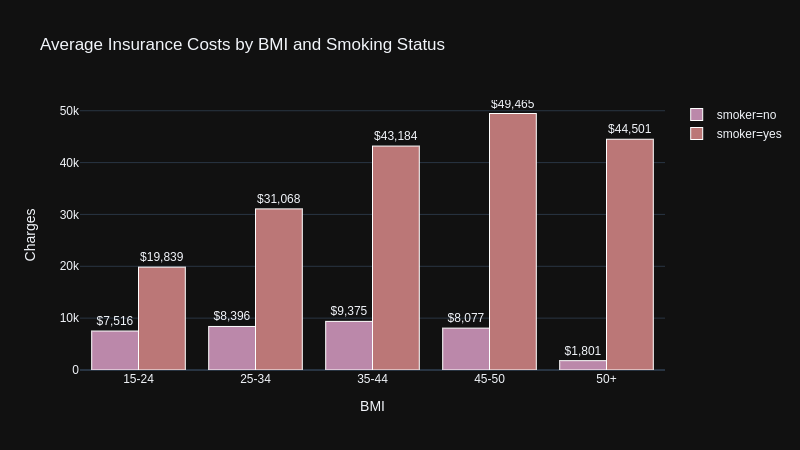

In [28]:
fig = px.bar(bmidf,x = 'BMI',y = 'Charges',color = 'smoker',barmode = 'group',text = 'Charges', color_discrete_sequence=['#B8A','#B77'],title = "Average Insurance Costs by BMI and Smoking Status",template= 'plotly_dark')
fig.update_traces(texttemplate = '$%{text:,.0f}',textposition='outside',marker_line=dict(width=1, color='#FFFFFF'))
gitly.show(fig)

## Distribution based on Average Insurance Costs by Region and Smoking Status

In [29]:
regiondf = df.groupby(['region','smoker'])['charges'].mean()

In [30]:
regiondf = regiondf.rename('Charges').reset_index().sort_values('smoker',ascending = True)

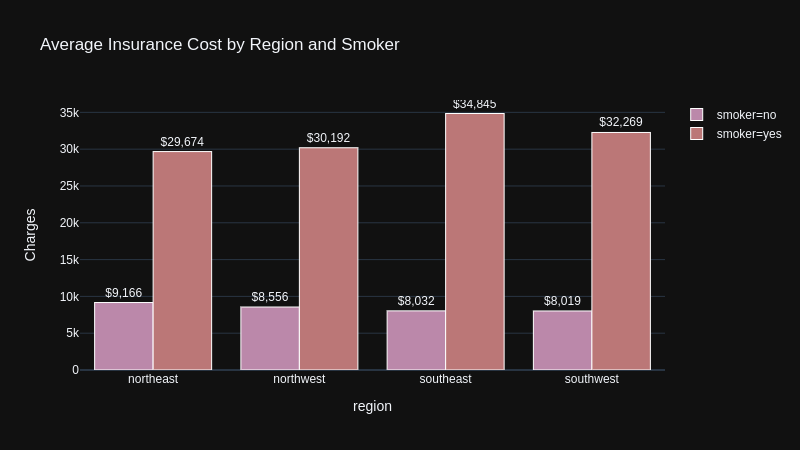

In [31]:
fig = px.bar(regiondf,x = 'region',y = 'Charges',color = 'smoker',barmode = 'group',text = 'Charges',color_discrete_sequence=['#B8A','#B77'],title = 'Average Insurance Cost by Region and Smoker',template= 'plotly_dark')
fig.update_traces(texttemplate = '$%{text:,.0f}',textposition='outside',marker_line=dict(width=1, color='#FFFFFF'))
gitly.show(fig)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

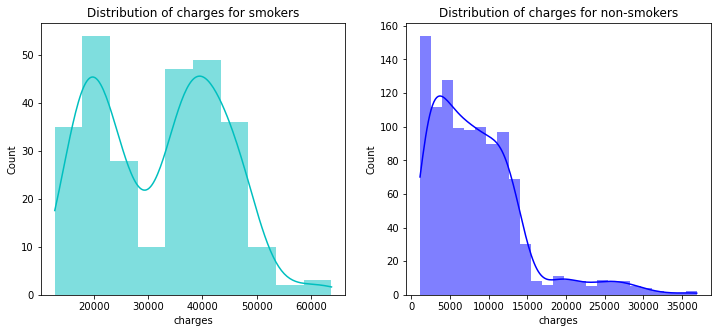

In [ ]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.histplot(df[(df.smoker=='yes')]['charges'], color='c',ax=ax,kde=True, linewidth=0)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.histplot(df[(df.smoker=='no')]['charges'],color='b',ax=ax,kde=True,linewidth=0)
ax.set_title('Distribution of charges for non-smokers')

### Charges Based on Sex

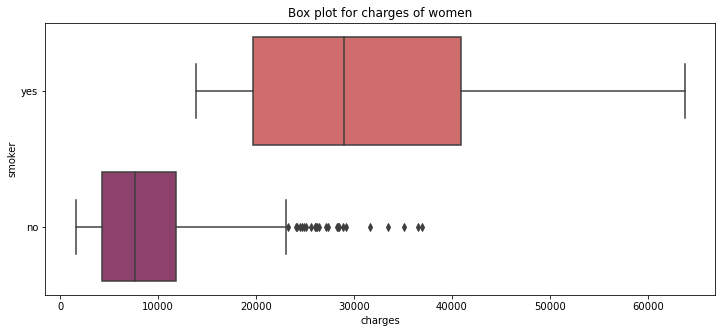

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y='smoker',x='charges',data=df[(df.sex == 'female')] , orient='h',palette='flare')

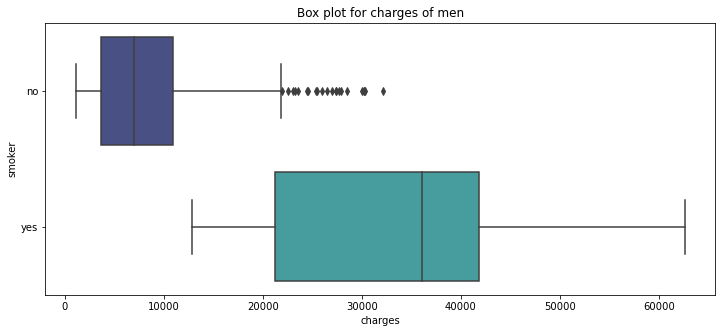

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y='smoker',x='charges',data=df[(df.sex == 'male')] , orient='h',palette='mako')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

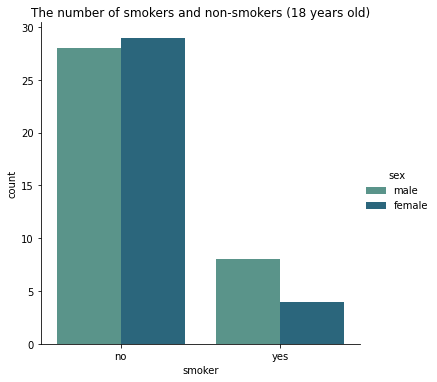

In [ ]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='crest',data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

In [ ]:
df2 = df

In [ ]:
region_dummies = pd.get_dummies(df2['region'], drop_first=True)
#region_dummies.head()

In [ ]:
df2 = pd.concat([df2, region_dummies], axis=1)

In [ ]:
df2.drop(['region'],axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df2.sex.drop_duplicates())
df2.sex = le.transform(df2.sex)
#smoker or not
le.fit(df.smoker.drop_duplicates())
df2.smoker = le.transform(df2.smoker)
#region
# le.fit(df.region.drop_duplicates())
# df.region = le.tranaform(df.region)

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,charges,Age_Group,BMI,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,18 - 29,25-34,0,0,1
1,18,1,33.770,1,0,1725.55230,18 - 29,25-34,0,1,0
2,28,1,33.000,3,0,4449.46200,18 - 29,25-34,0,1,0
3,33,1,22.705,0,0,21984.47061,30 - 49,15-24,1,0,0
4,32,1,28.880,0,0,3866.85520,30 - 49,25-34,1,0,0


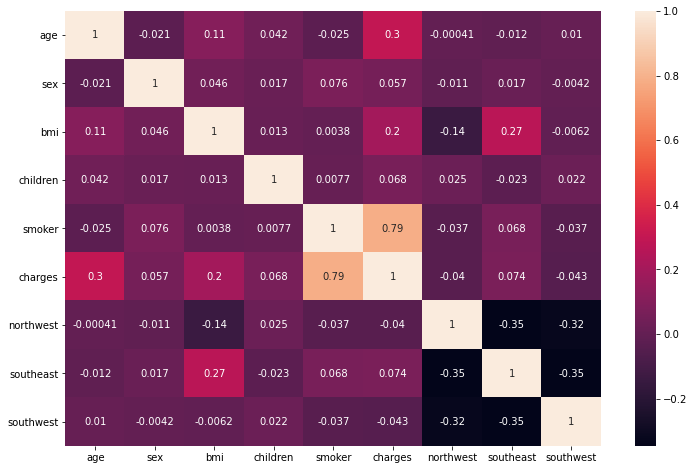

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [ ]:
df.drop(['Age_Group','BMI'],axis = 1,inplace=True)

## Feature Engineering

P:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



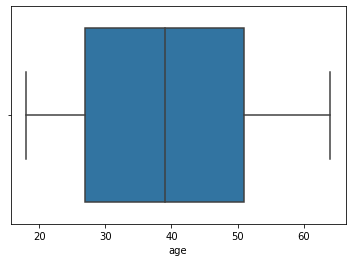

P:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



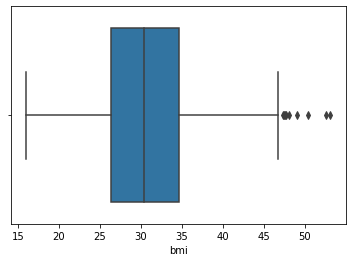

P:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



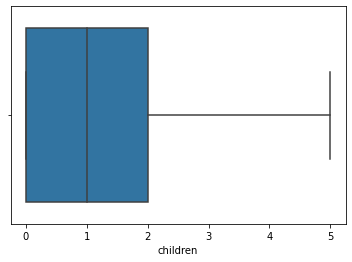

P:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



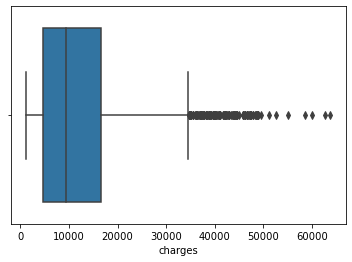

In [ ]:
for i in df.columns:
    if df[i].dtypes !='O':
        sns.boxplot(df[i])
        plt.show()

## Capping and Flooring for Outlier Treatment

In [ ]:
for i in df.columns:
    if df[i].dtype !='O':
        df[i] = np.clip(df[i],df[i].quantile(0.1),df[i].quantile(0.95))

In [ ]:
df.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.95])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.208520,30.742767,1.049327,13054.910465
std,13.888724,5.384601,1.097609,11300.867890
min,19.000000,22.990000,0.000000,2346.533615
10%,19.000000,22.990000,0.000000,2351.038000
20%,24.000000,25.326000,0.000000,3991.575720
30%,29.000000,27.360000,0.000000,5484.846770
40%,34.000000,28.797000,0.000000,7369.052730
50%,39.000000,30.400000,1.000000,9382.033000
60%,44.000000,32.032000,1.000000,11399.857160


## One-Hot Encoding

In [ ]:
finaldf = pd.get_dummies(df,drop_first=True)
finaldf2 = pd.get_dummies(df,drop_first=False) #for heatmap representation

In [ ]:
finaldf.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.924000,0,1,0,0,1
1,19,33.77,1,2346.533615,1,0,0,1,0
2,28,33.00,3,4449.462000,1,0,0,1,0
3,33,22.99,0,21984.470610,1,0,1,0,0
4,32,28.88,0,3866.855200,1,0,1,0,0


In [ ]:
# Predictors
x = finaldf.drop('charges',axis=1)
# Target Variable
y = finaldf.charges

## Correlation Heatmap

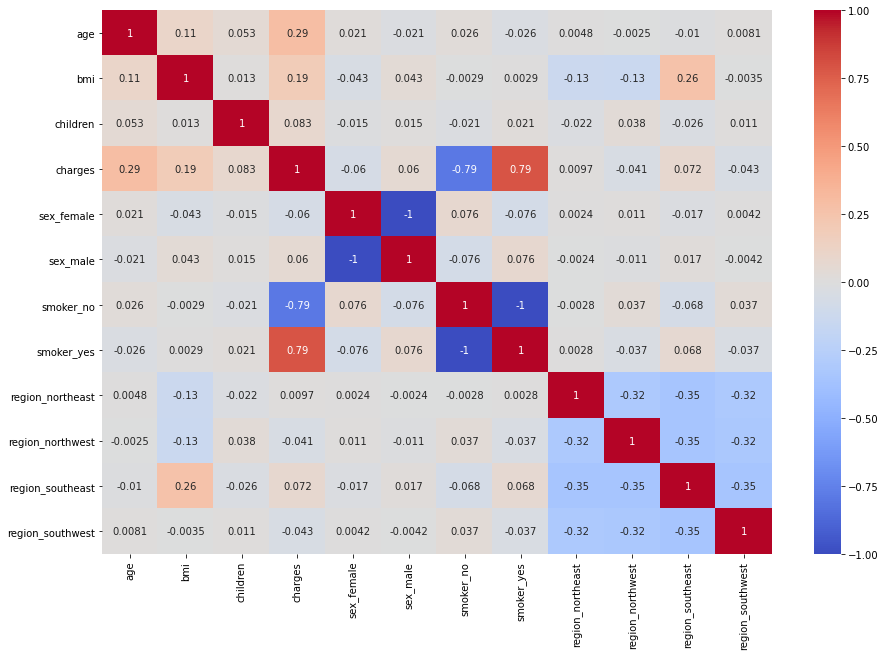

In [ ]:
plt.figure(figsize= (15,10))
sns.heatmap(finaldf2.corr(),cmap='coolwarm',annot = True)
plt.show()

***Some of the important Features: 1) AGE 2) BMI 3) Smoker_yes 4) Region_southeast (These were positively Correlated Features)*** 

***Smoking Status was the most important feature for predicting Charges***

## Selecting best model

In [ ]:
#define every model with multiple parameters for the selection of best model with best parameters.
model_params = {
    'XGB':{
        'model':XGBRegressor(n_jobs = -1,tree_method = 'gpu_hist'),
        'params':{
            'n_estimators':[50,100,200,300,400],   
            
        }
    },
    'RF':{
        'model':RandomForestRegressor(n_jobs = -1),
        'params':{
            'n_estimators':[50,100],
            'criterion' : ['mse',"mae"]
            
        }
    },
    'DT':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion' : ["friedman_mse",'mse','mae'],
            'splitter':["best", "random"]
        }
    }
}

In [ ]:
scores = [] #List for all the best scores
for model_name, modelp in model_params.items():
    clf = GridSearchCV(modelp['model'],modelp['params'],cv = 5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
scoreddf = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scoreddf

***Best Model --> Random Forest || Best Parameters --> 'criterion': 'absolute_error', 'n_estimators': 100***

## Train - Test Split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=444)

## Model Building

In [ ]:
rf = RandomForestRegressor(n_jobs = -1,n_estimators = 50,criterion = "mae")

In [ ]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [ ]:
print(f'Accuracy of Model : {round(r2_score(ytest,ypred),2)*100}%')